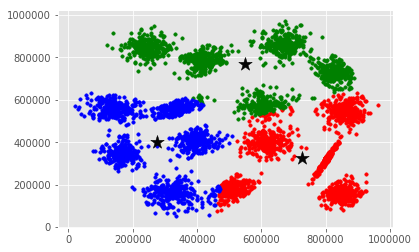

In [37]:
%matplotlib inline
import numpy as np
import pandas as pd
from copy import deepcopy
from matplotlib import pyplot as plt

def getData(filename , delim='\t' , k=3):
    data = pd.read_csv(filename , delimiter=delim)
    f1 = data['V1'].values
    f2 = data['V2'].values
    X = np.array(list(zip(f1 , f2)))
    C_x = np.random.randint(0 , np.max(X) - 20 , size=k)
    C_y = np.random.randint(0 , np.max(X) - 20 , size=k)
    C = np.array(list(zip(C_x , C_y)) , dtype=np.int64)
    return C

def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

'''
data = pd.read_csv('s1.csv', delimiter='\t')
print(data.shape)
data.head()

f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))

C_x = np.random.randint(0 , np.max(X) - 20 , size=k)
C_y = np.random.randint(0 , np.max(X) - 20 , size=k)
C = np.array(list(zip(C_x , C_y)) , dtype=np.int64)
print(C)
'''

def reduce_error(C):
    # To store the value of centroids when it updates
    C_old = np.zeros(C.shape)
    # Cluster Lables(0, 1, 2)
    clusters = np.zeros(len(X))
    # Error func. - Distance between new centroids and old centroids
    error = dist(C, C_old, None)
    # Loop will run till the error becomes zero
    while error != 0:
        # Assigning each value to its closest cluster
        for i in range(len(X)):
            distances = dist(X[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        # Storing the old centroid values
        C_old = deepcopy(C)
        # Finding the new centroids by taking the average value
        for i in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
            C[i] = np.mean(points, axis=0)
        error = dist(C, C_old, None)
    return (clusters , points)

def plot(clusters , points , k):    
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    fig, ax = plt.subplots()
    for i in range(k):
            points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
            ax.scatter(points[:, 0], points[:, 1], s=12, c=colors[i])
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
    
K = 3
C = getData('s1.csv' , k=K)
clusters , points = reduce_error(C)
plot(clusters , points , K)

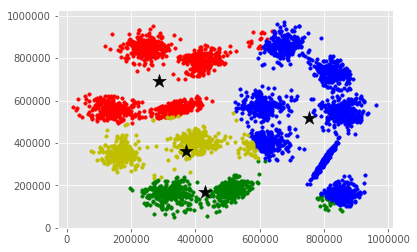

In [38]:
K = 4
C = getData('s1.csv' , k=K)
clusters , points = reduce_error(C)
plot(clusters , points , K)

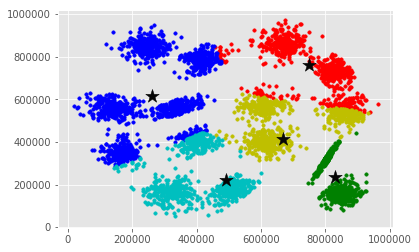

In [39]:
K = 5
C = getData('s1.csv' , k=K)
clusters , points = reduce_error(C)
plot(clusters , points , K)

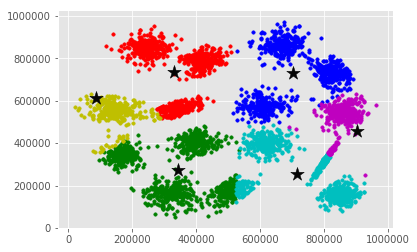

In [40]:
K = 6
C = getData('s1.csv' , k=K)
clusters , points = reduce_error(C)
plot(clusters , points , K)

IndexError: list index out of range

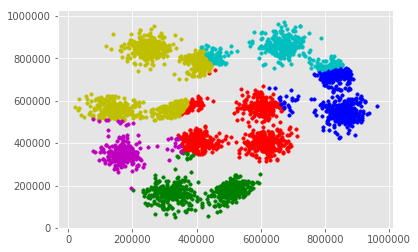

In [41]:
K = 7
C = getData('s1.csv' , k=K)
clusters , points = reduce_error(C)
plot(clusters , points , K)

IndexError: list index out of range

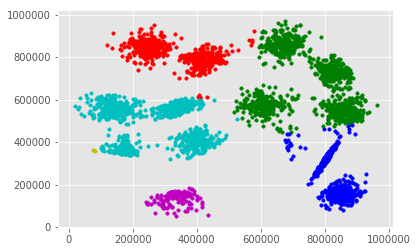

In [42]:
K = 8
C = getData('s1.csv' , k=K)
clusters , points = reduce_error(C)
plot(clusters , points , K)

IndexError: list index out of range

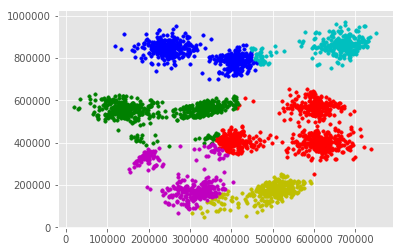

In [45]:
K = 9
C = getData('s1.csv' , k=K)
clusters , points = reduce_error(C)
plot(clusters , points , K)

In [50]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
print(C) # From Scratch
print(centroids) # From sci-kit learn



[[543590 454470]
 [237525 552476]
 [318880 819053]
 [452940  68451]
 [563609 886169]
 [265112 214625]
 [929978 145914]
 [ 30007 334209]
 [817843 681057]]
[[739814.65373135 683110.92686567]
 [276290.02219929 585637.49303046]
 [608335.67846779 245965.17585606]]


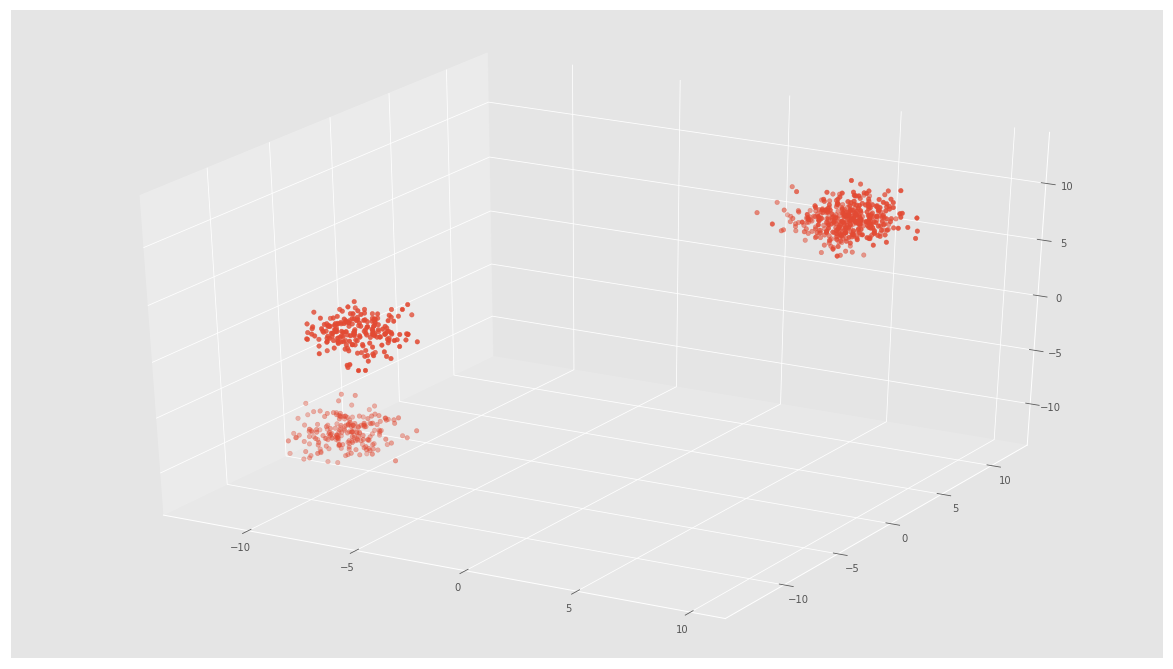

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

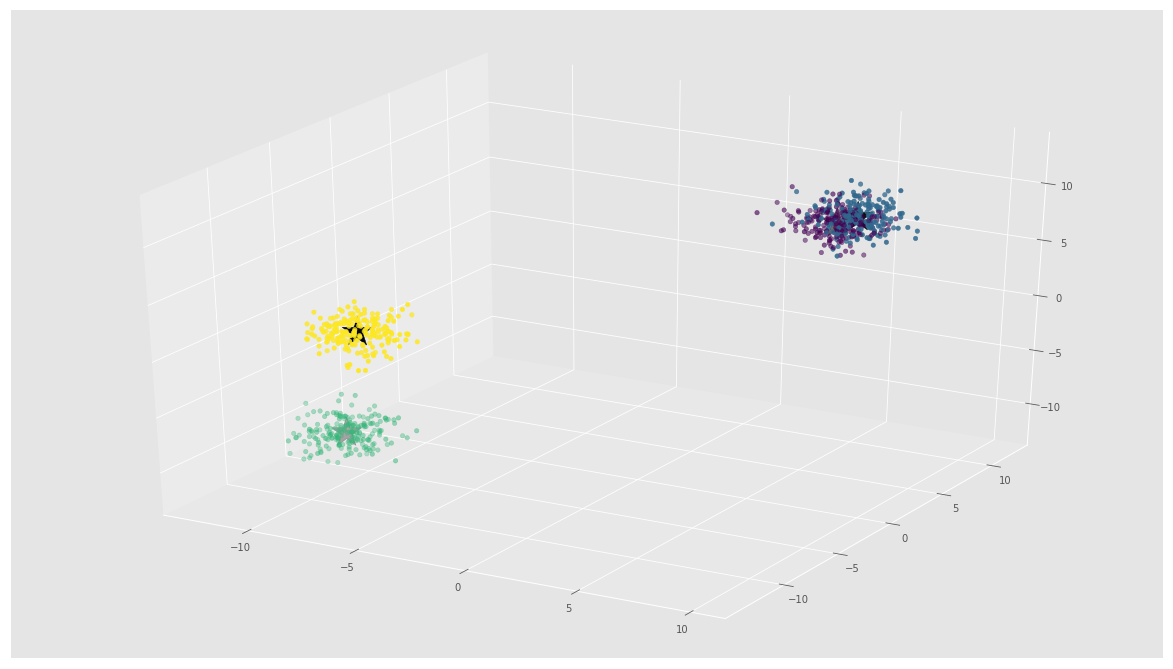

In [52]:
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)
